## Arewa DataScience Academy
### Deep Learning Cohort 1.0
### Name : mohammed nasiru
### Email : katada3020@gmail.com

### WEEK 2 Exercises

In [1]:
#import torch
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


In [2]:
# Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'using device: {device}')

using device: cuda


##### 1 Create a straight line dataset using the linear regression formula (weight * X + bias).

In [3]:
#creating known parameters
#set weight=0.3, bias=0.9
weight = 0.3
bias = 0.9

#create data
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
#creating linear regression
y = weight * X * bias


#### 2 Split the data into 80% training, 20% testing.

In [4]:
#spliting the data into train and test
train_split = int(0.8 * len(X))
X_train,y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

print(f'lenghth of X_train: {len(X_train)}')
print(f'lenght of y_train : {len(y_train)}')
print(f'length of X_test: {len(X_test)}')
print(f'length of y_test: {len(y_test)}')


lenghth of X_train: 40
lenght of y_train : 40
length of X_test: 10
length of y_test: 10


#### 1c. Plot the training and testing data so it becomes visual.

In [5]:
def plot_predictions(train_data = X_train,
                     train_label = y_train,
                     test_data = X_test,
                     test_label = y_test,
                     predictions = None) :
    plt.figure(figsize=(10,7))

    #plot training data
    plt.scatter(train_data,train_label, c='b', s=4, label='Training data')
    #plot test data
    plt.scatter(test_data,test_label, c='g', s=4, label='Test training')

    if predictions is not None:
        plt.scatter(test_data,predictions, c='r', s=4, label = 'prediction')

    plt.legend(prop={'size' : 14})

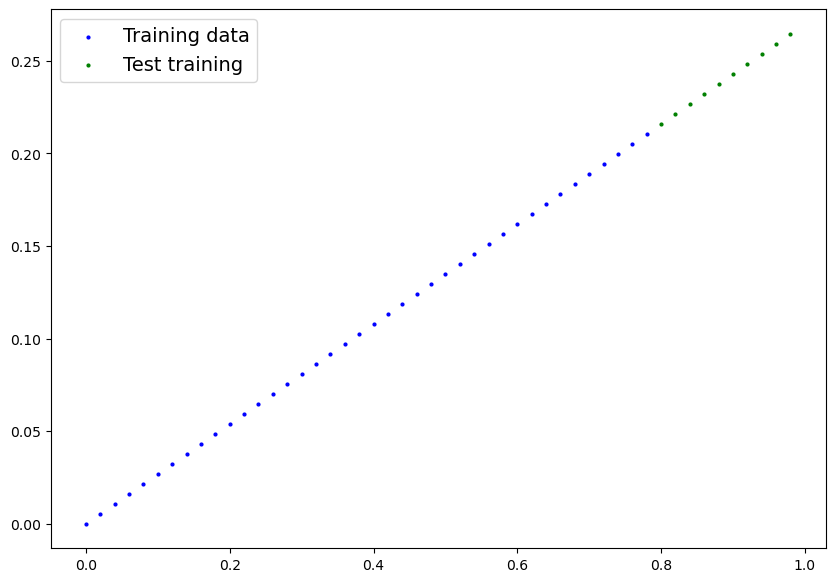

In [ ]:
plot_predictions()

#### 2 Build a PyTorch model by subclassing nn.Module.

In [6]:
#build a model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1,
                                               dtype = torch.float32),
                                               requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1,
                                             dtype=torch.float32),
                                             requires_grad=True)
        #Implement the forward()
        def forward(self, X:torch.Tensor) -> torch.Tensor:
            return self.weight * X + self.bias

In [8]:

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, dtype=torch.float32), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float32), requires_grad=True)

    def forward(self, X: torch.Tensor) -> torch.Tensor:
        return self.weight * X + self.bias


In [9]:
#settining manual_seed
torch.manual_seed(32)

# Create an instance of the model
model = LinearRegressionModel()

# List named parameters
model.state_dict()

OrderedDict([('weight', tensor([0.8651])), ('bias', tensor([0.0284]))])

#### 3 Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.

In [10]:
#creating a loss function
loss = nn.L1Loss()

#create optimizer
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr = 0.01)

In [12]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model(X_train)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss_cal = loss(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss_cal.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model.eval()

    with torch.no_grad():
        # 1. Forward pass on test data
        test_pred = model(X_test)

        # 2. Calculate loss on test data
        test_loss = loss(test_pred, y_test.type(torch.float))
        # Print out what's happening
        if epoch % 20 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss_cal.item())
            test_loss_values.append(test_loss.item())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss_cal.item()} | MAE Test Loss: {test_loss.item()} ")


Epoch: 0 | MAE Train Loss: 0.260527104139328 | MAE Test Loss: 0.5446090698242188 
Epoch: 20 | MAE Train Loss: 0.12197054922580719 | MAE Test Loss: 0.33972087502479553 
Epoch: 40 | MAE Train Loss: 0.09385453164577484 | MAE Test Loss: 0.2468867003917694 
Epoch: 60 | MAE Train Loss: 0.08464816957712173 | MAE Test Loss: 0.2059520035982132 
Epoch: 80 | MAE Train Loss: 0.07766816020011902 | MAE Test Loss: 0.18391187489032745 


#### number 4

In [13]:
# 1. Set the model in evaluation mode
model.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():

  y_preds = model(X_test)
y_preds

tensor([[0.3500],
        [0.3625],
        [0.3749],
        [0.3874],
        [0.3998],
        [0.4122],
        [0.4247],
        [0.4371],
        [0.4496],
        [0.4620]])

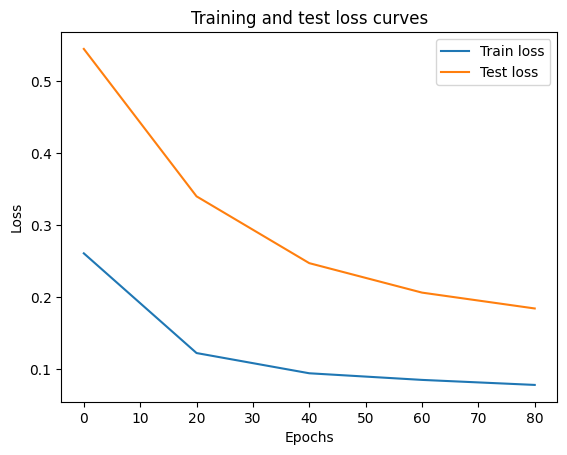

In [14]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [21]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "02_pytorch_workflow.pth"
MODEL_SAVE = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE}")
torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE)

Saving model to: models/02_pytorch_workflow.pth


In [19]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE))

<All keys matched successfully>

In [20]:
# 1. Put the loaded model into evaluation mode
loaded_model.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model(X_test) # perform a forward pass on the test data with the loaded model

In [ ]:
#loaded model into evaluation mode
loaded_model.eval()

#inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model(X_test) # perform a forward pass on the test data with the loaded model

### exercise 2
### pytorch workkflow advance assignment


In [24]:
#iImporting the neccessary libraries
import torch
from torch import  nn
import numpy as np
import pandas as pd
import zipfile
import matplotlib.pyplot as plt

In [26]:
# downloading the provided dataset
!wget https://archive.ics.uci.edu/static/public/607/synchronous+machine+data+set.zip -O data.zip
# unziping the data
# unziping the data
with zipfile.ZipFile('data.zip', 'r') as my_zip:
  my_zip.extractall()
  # reading the the data
dataset_name = "synchronous machine.csv"
data = pd.read_csv(dataset_name, delimiter=';', thousands=',')
data

--2024-01-02 06:56:36--  https://archive.ics.uci.edu/static/public/607/synchronous+machine+data+set.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘data.zip’

data.zip                [ <=>                ]  14.37K  --.-KB/s    in 0.03s   

2024-01-02 06:56:36 (549 KB/s) - ‘data.zip’ saved [14713]



,Iy,PF,e,dIf,If
0,3,66,34,383,1563
1,3,68,32,372,1552
2,3,7,3,36,154
3,3,72,28,338,1518
4,3,74,26,317,1497
...,...,...,...,...,...
552,6,91,9,142,1322
553,6,93,7,151,1331
554,6,95,5,16,134
555,6,97,3,16,134


In [62]:
# converting our data to numpy data
numpy_data = data.values
numpy_data

array([[   3,   66,   34,  383, 1563],
       [   3,   68,   32,  372, 1552],
       [   3,    7,    3,   36,  154],
       ...,
       [   6,   95,    5,   16,  134],
       [   6,   97,    3,   16,  134],
       [   6,   99,    1,   16,  134]])

In [63]:
# converting numpy array to PyTorch tensor
original_data_tensor = torch.from_numpy(numpy_data)
# checking
original_data_tensor


tensor([[   3,   66,   34,  383, 1563],
        [   3,   68,   32,  372, 1552],
        [   3,    7,    3,   36,  154],
        ...,
        [   6,   95,    5,   16,  134],
        [   6,   97,    3,   16,  134],
        [   6,   99,    1,   16,  134]])

#### Q2. Art of "Tensor Manipulation"
(a) Print the size of the dataset.

In [32]:
# printing the size of the data
print('the size of the dataset is',original_data_tensor.shape)

the size of the dataset is torch.Size([557, 5])


#####(b) Create a tensor, `my_pi_tensor` of same size as `original_data_tensor` containing values of `3.142` at
every point and placed on your GPU device. Print the first `13 rows`. Print tensor device location.
Print tensor datatype.

In [68]:
device = "cuda"
my_pi_tensor = torch.full(original_data_tensor.size(), 3.142).to(device)
print(f' first 13 rows: \n  {my_pi_tensor[:13]}')
print(f' device location: {my_pi_tensor.device}')
print(f' tensor data type: {my_pi_tensor.dtype}')


 first 13 rows: 
  tensor([[3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420],
        [3.1420, 3.1420, 3.1420, 3.1420, 3.1420]], device='cuda:0')
 device location: cuda:0
 tensor data type: torch.float32


In [70]:

#Print the fifth-root of the sum of all values in my pi tensor.

torch.pow(torch.sum(my_pi_tensor), 1 / 5)

tensor(6.1434, device='cuda:0')

(d) Create a new tensor, ``my_data_tensor`` using the first and last 100 rows from the `original_data_tensor`.
Print size of my data tensor [Expect a size of 200 rows].

In [71]:

my_data_tensor = torch.cat([original_data_tensor[:100, :], original_data_tensor[-100:, :]])
my_data_tensor.size()

torch.Size([200, 5])

In [72]:

#Create two 1-D tensors, features and target from my data tensor. The feature is dIf (Changing of excitation current of synchronous machine) I) column and target is If (Excitation current of synchronous machine). ­

X = my_data_tensor[:, 3]
y = my_data_tensor[:, 4]

In [73]:
# splitting the data to 75:25 ratio
train_test_split = int((len(X) * 0.75))

# training data
x_train = X[:train_test_split]
y_train = y[:train_test_split]

# testing data
x_test = X[train_test_split:]
y_test = y[train_test_split:]

len(x_train), len(y_train), len(x_test), len(y_test)

(150, 150, 50, 50)

In [74]:
# subclassing nn.Module
class LinearRegressionModelV3(nn.Module):
  def __init__(self):
    super().__init__()

    self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

    self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

    # Defining forward computation
  def forward(self, x_1: torch.Tensor) -> torch.Tensor:
    #return self.linear_layer(x_1)
    return self.weights * x_1 + self.bias

torch.manual_seed(42)
model = LinearRegressionModel()
model, model.state_dict()

(LinearRegressionModel(),
 OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))]))

In [75]:
# Checking the locatiopn of the model
next(model.parameters()).device

device(type='cpu')

In [76]:
#moving our model back to gpu for faster acceleration
model.to(device)

LinearRegressionModel()

In [77]:
# creating loss function
loss_fn = nn.L1Loss()

# Creating optimizer and setting learning rate to be 0.01
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.001)


#### Q4. Train model for any number of epochs. Generate 1 plot of Loss against Epoch during model training and testing. Choose any set of hyperparameters for model training.

In [78]:
torch.manual_seed(42)

# set number of epoch
epochs = 200

# Creating an empty lists to keep track of our loss and the number of epochs
train_loss_values = []
test_loss_values = []
epoch_count = []

# Setting the data back the GPU
x_train = x_train.to(device)
y_train = y_train.to(device)
x_test = x_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):

  model.train()

  # 1. Forward pass
  preds = model(x_train)

  # 2. Calculating loss
  loss = loss_fn(y_preds, y_train)

  # 3. Zero gradient optomizer
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Stepping the optimizer
  optimizer.step()

  ### Testing
  model.eval() # Putting the model in the evaluation mode

  # 1. Forward pass
  with torch.inference_mode():
    test_preds = model(x_test)

    # 2. Calculating the loss
    test_loss = loss_fn(test_preds, y_test)

  if epoch % 20 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(loss.detach().numpy())
    test_loss_values.append(test_loss.detach().numpy())



RuntimeError: ignored

In [79]:
torch.manual_seed(42)

# set number of epoch
epochs = 1000

# Creating empty lists to keep track of our loss and the number of epochs
train_loss_values = []
test_loss_values = []
epoch_count = []

# Setting the data back to the GPU
x_train = x_train.to(device)
y_train = y_train.to(device)
x_test = x_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):

  model.train()

  # 1. Forward pass
  y_preds = model(x_train)

  # 2. Calculating loss
  loss = loss_fn(y_preds, y_train)

  # 3. Zero gradient optimizer
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Stepping the optimizer
  optimizer.step()

  ### Testing
  model.eval()

  # 1. Forward pass
  with torch.no_grad():
    test_preds = model(x_test)

    # 2. Calculating the loss
    test_loss = loss_fn(test_preds, y_test)

  if epoch % 200 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(loss.item())
    test_loss_values.append(test_loss.item())
print(f'{epoch} \n {train_loss_values}')


999 
 [1233.6229248046875, 425.35675048828125, 425.3210144042969, 425.2848205566406, 425.2471923828125]


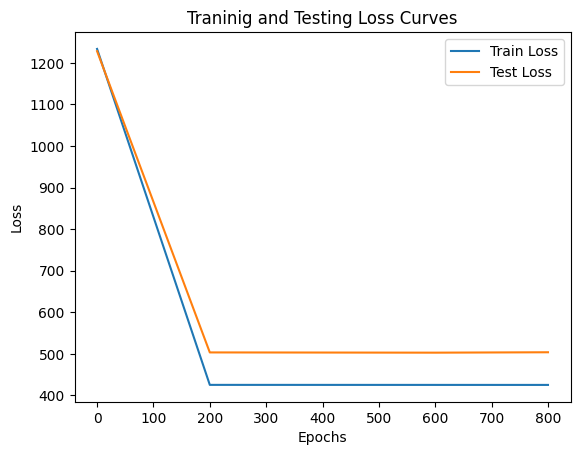

In [80]:
# Plotting training loss against epoch
plt.plot(epoch_count, train_loss_values, label='Train Loss')

# Plotting testing loss against epoch
plt.plot(epoch_count, test_loss_values, label='Test Loss')
plt.title('Traninig and Testing Loss Curves')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.legend();